In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load datasets
train_features = pd.read_csv('dataset/training_set_features.csv')
train_labels = pd.read_csv('dataset/training_set_labels.csv')
test_features = pd.read_csv('dataset/test_set_features.csv')

In [3]:
train_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
train_labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
test_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
household_adults                 249
h

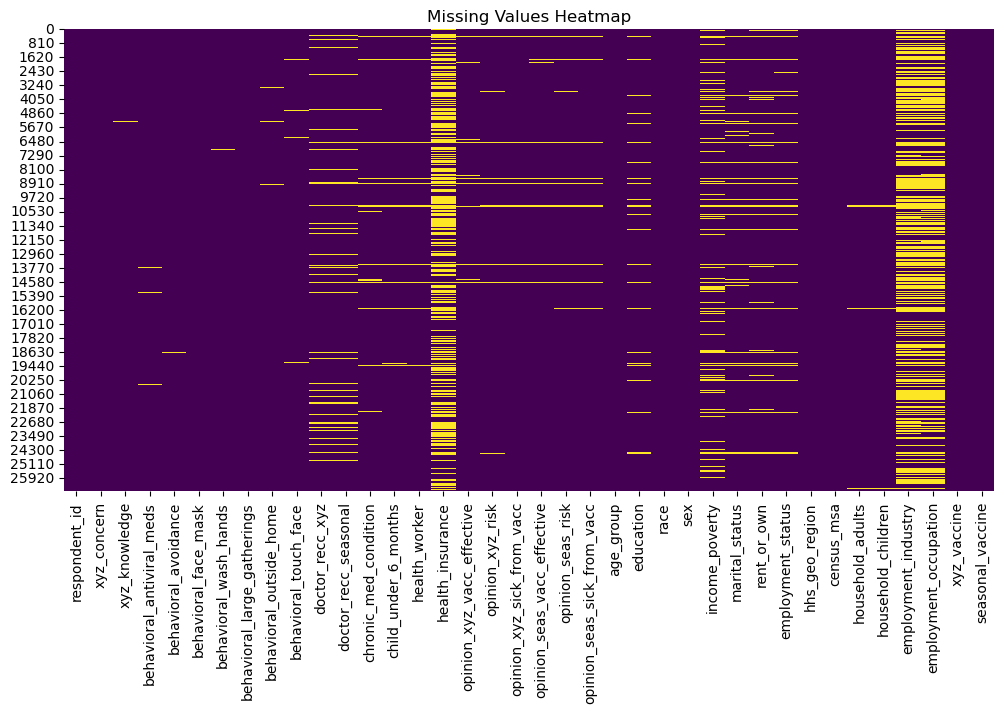

In [6]:
# Check for missing values
train_data = pd.merge(train_features, train_labels, on='respondent_id')

missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


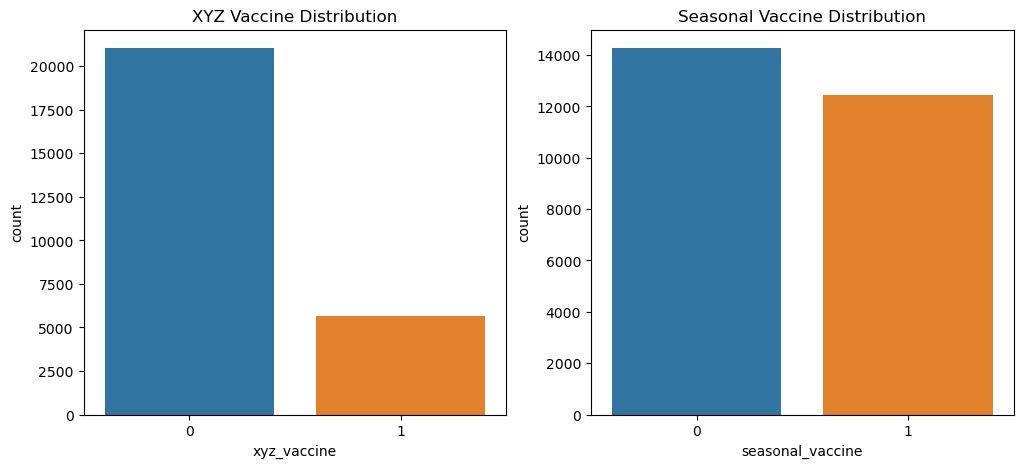

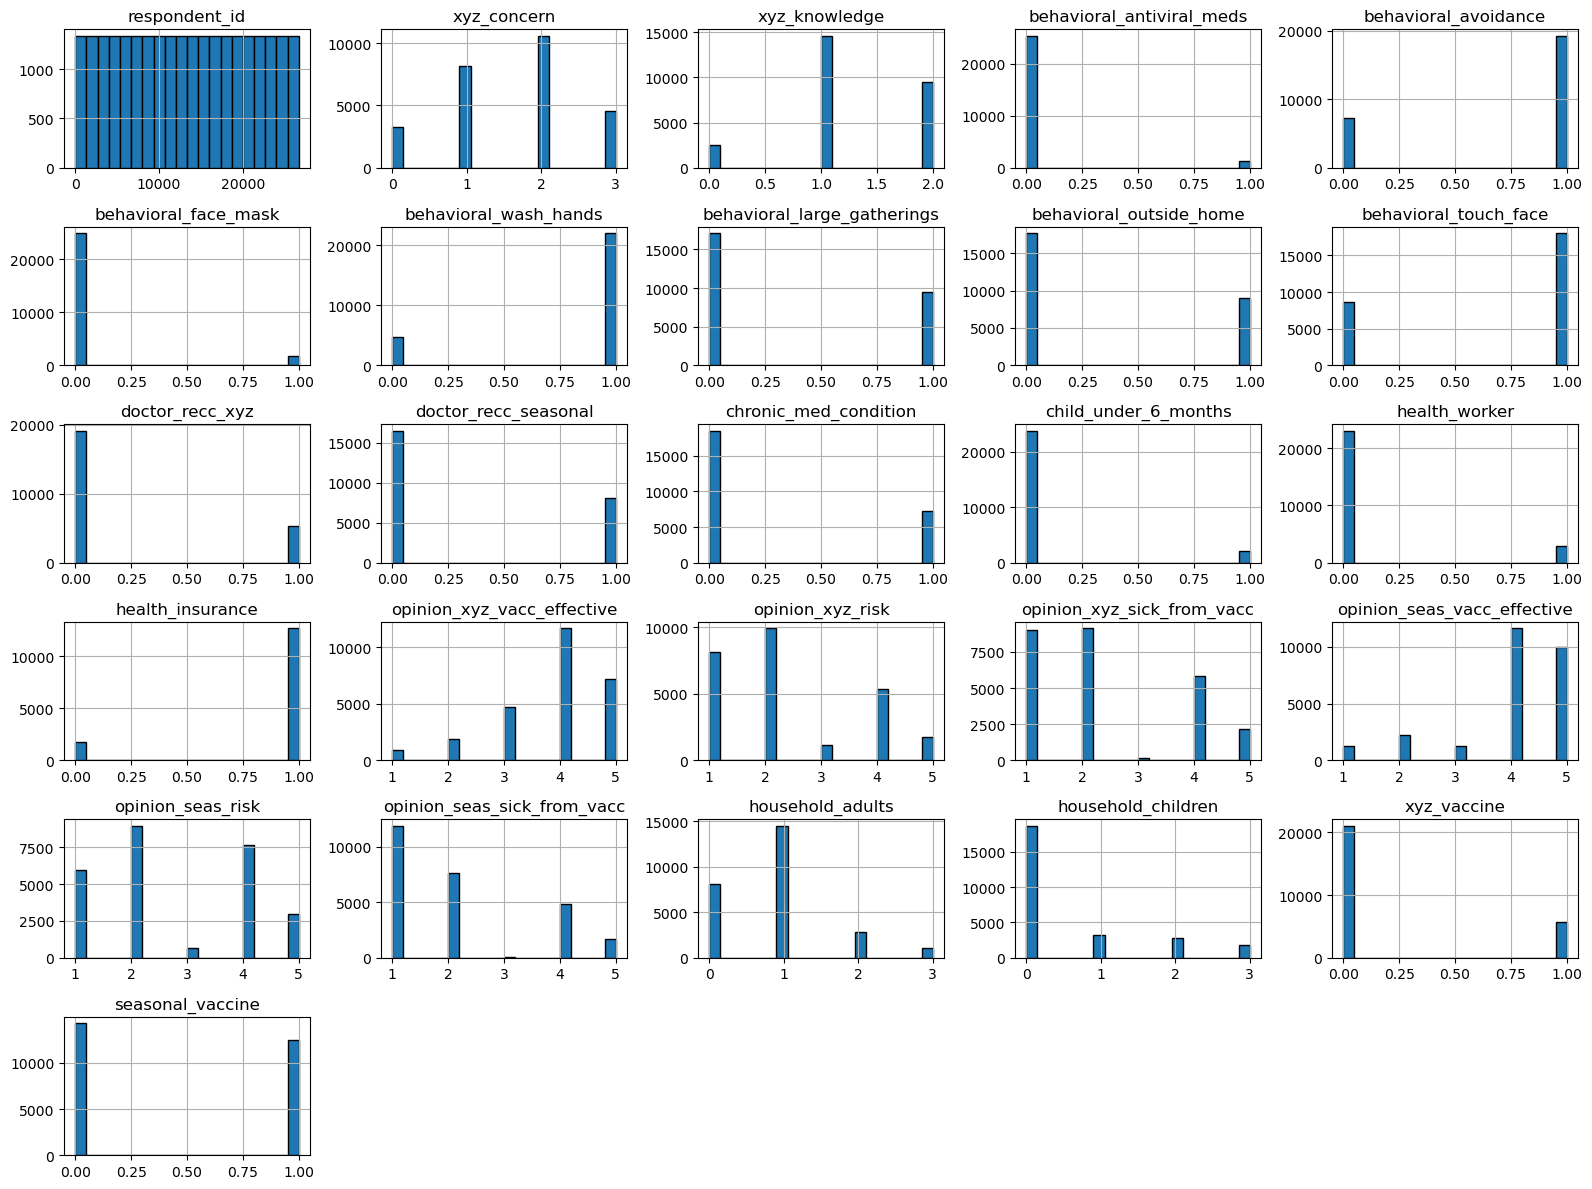

In [7]:
# Target variable distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='xyz_vaccine', data=train_data)
plt.title('XYZ Vaccine Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='seasonal_vaccine', data=train_data)
plt.title('Seasonal Vaccine Distribution')
plt.show()

# Distribution of numerical features
numerical_cols = train_data.select_dtypes(exclude=['object']).columns
train_data[numerical_cols].hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

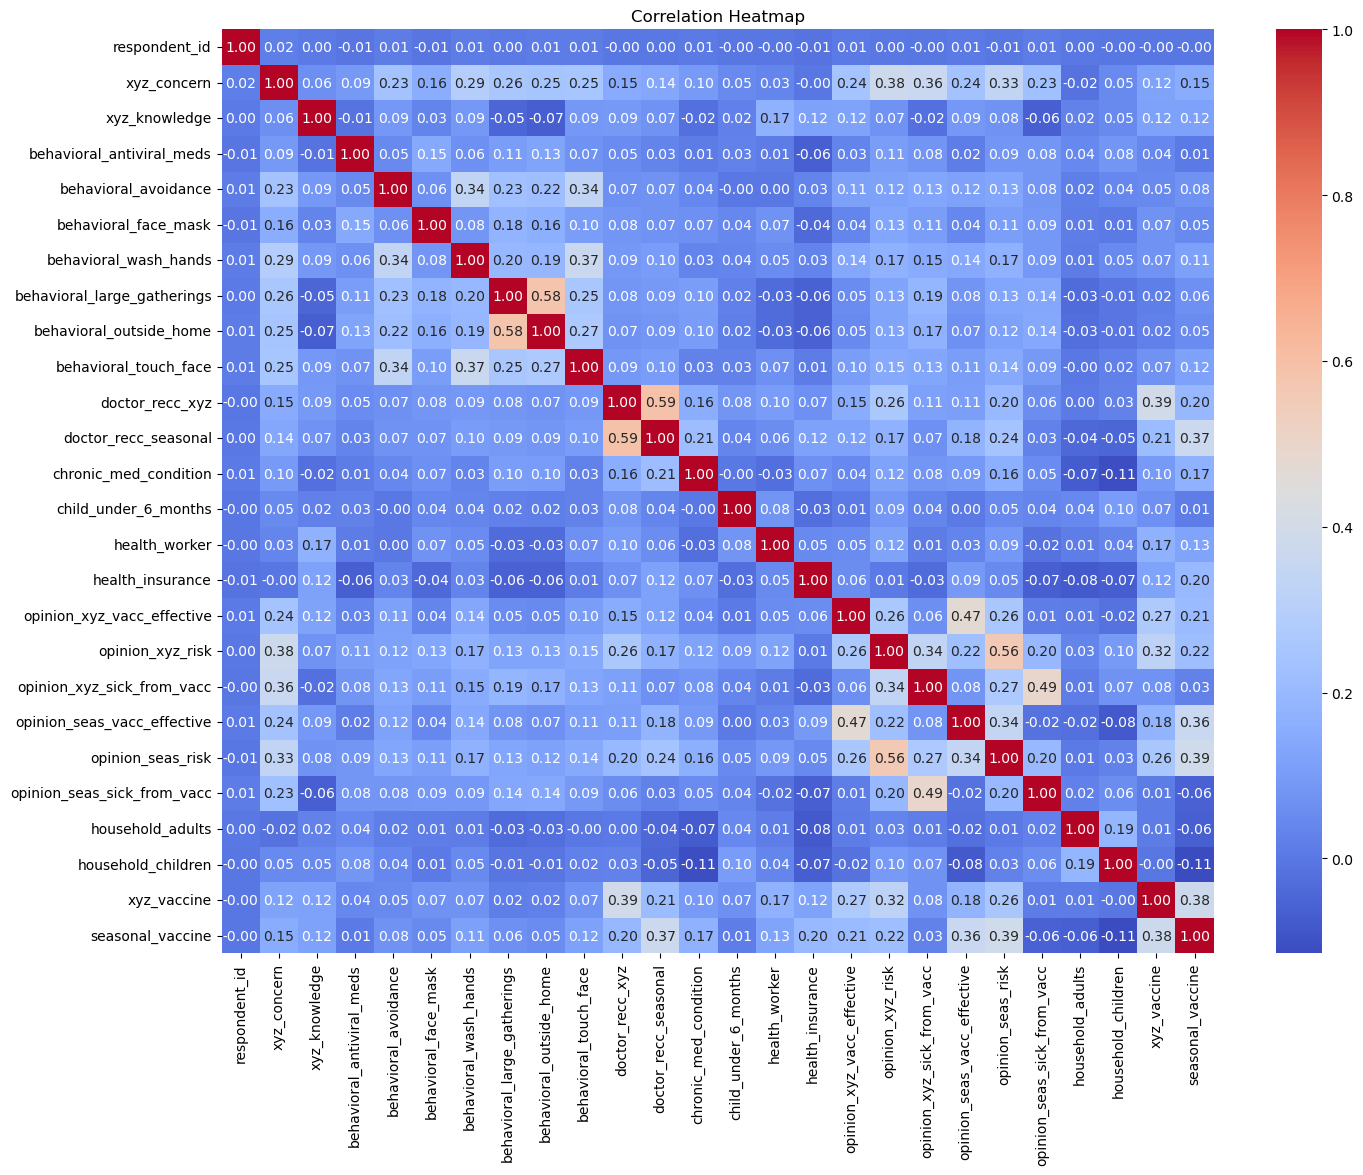

In [8]:
# Select only numerical columns for correlation matrix
numerical_cols = train_data.select_dtypes(include=['number']).columns

# Calculate correlation matrix on numerical columns only
correlation_matrix = train_data[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Merge training features and labels
train_data = pd.merge(train_features, train_labels, on='respondent_id')

# Separate features and target variables
X = train_data.drop(columns=['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'])
y_xyz = train_data['xyz_vaccine']
y_seasonal = train_data['seasonal_vaccine']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_xyz_train, y_xyz_val, y_seasonal_train, y_seasonal_val = train_test_split(X_preprocessed, y_xyz, y_seasonal, test_size=0.2, random_state=42)


# Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize models with increased max_iter and different solver
model_xyz = LogisticRegression(max_iter=1000, solver='saga')
model_seasonal = LogisticRegression(max_iter=1000, solver='saga')

# Train models
model_xyz.fit(X_train, y_xyz_train)
model_seasonal.fit(X_train, y_seasonal_train)

# Validate models
y_xyz_pred = model_xyz.predict_proba(X_val)[:, 1]
y_seasonal_pred = model_seasonal.predict_proba(X_val)[:, 1]

# Calculate ROC AUC scores
roc_auc_xyz = roc_auc_score(y_xyz_val, y_xyz_pred)
roc_auc_seasonal = roc_auc_score(y_seasonal_val, y_seasonal_pred)

print(f'ROC AUC score for xyz vaccine: {roc_auc_xyz}')
print(f'ROC AUC score for seasonal vaccine: {roc_auc_seasonal}')

ROC AUC score for xyz vaccine: 0.8313560497188814
ROC AUC score for seasonal vaccine: 0.856062815973432


# Random Forest


In [16]:
# Train and evaluate Random Forest for xyz vaccine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf_model_xyz = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_xyz.fit(X_train, y_xyz_train)
y_xyz_pred = rf_model_xyz.predict_proba(X_val)[:, 1]
roc_auc_xyz = roc_auc_score(y_xyz_val, y_xyz_pred)
print(f'Random Forest ROC AUC for xyz vaccine: {roc_auc_xyz:.4f}')

# Train and evaluate Random Forest for seasonal vaccine
rf_model_seasonal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_seasonal.fit(X_train, y_seasonal_train)
y_seasonal_pred = rf_model_seasonal.predict_proba(X_val)[:, 1]
roc_auc_seasonal = roc_auc_score(y_seasonal_val, y_seasonal_pred)
print(f'Random Forest ROC AUC for seasonal vaccine: {roc_auc_seasonal:.4f}')


Random Forest ROC AUC for xyz vaccine: 0.8295
Random Forest ROC AUC for seasonal vaccine: 0.8519


In [20]:
# Preprocess the test data
X_test = test_features.drop(columns=['respondent_id'])
X_test_preprocessed = preprocessor.transform(X_test)

# Make predictions
test_xyz_pred = model_xyz.predict_proba(X_test_preprocessed)[:, 1]
test_seasonal_pred = model_seasonal.predict_proba(X_test_preprocessed)[:, 1]

# Create submission file
submission = pd.DataFrame({
    'respondent_id': test_features['respondent_id'],
    'xyz_vaccine': test_xyz_pred,
    'seasonal_vaccine': test_seasonal_pred
})

submission.to_csv('final.csv', index=False)
